In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Get and visualize data

In [63]:
cols = ["fLength", "fWidth","fSize","fConc", "fConc1", "fAsym", "fM3Long","fM3Trans","fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols) #sets the elements of the list cols as the labels for the series in the df
df["class"].unique()

array(['g', 'h'], dtype=object)

In [64]:
df["class"] = pd.Series(df["class"] == "g").astype(int) #sets all class g (gamma particles) to 1
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


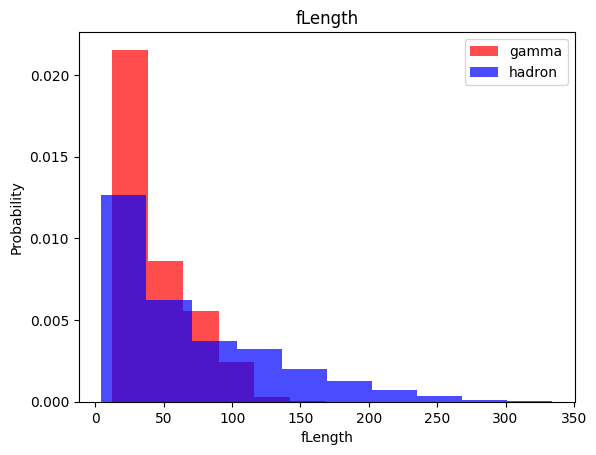

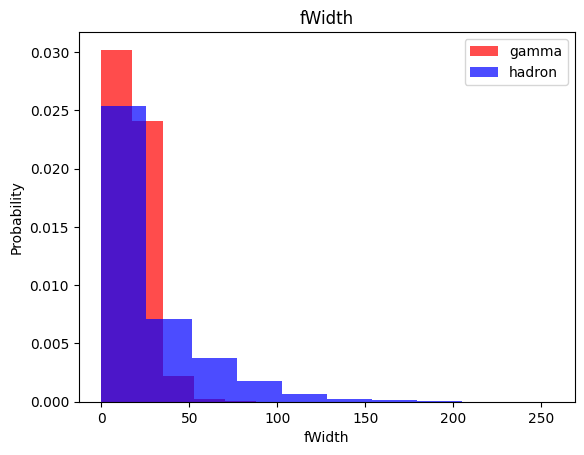

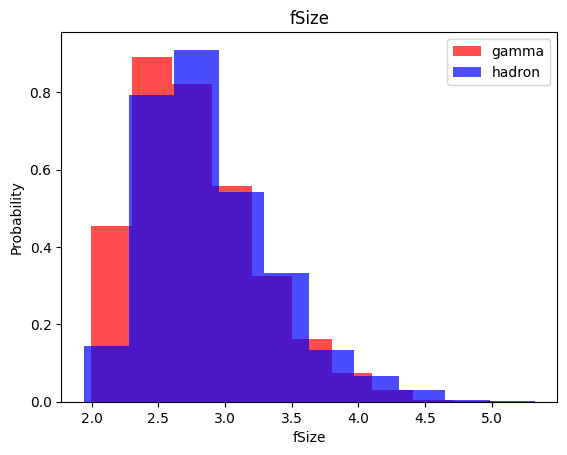

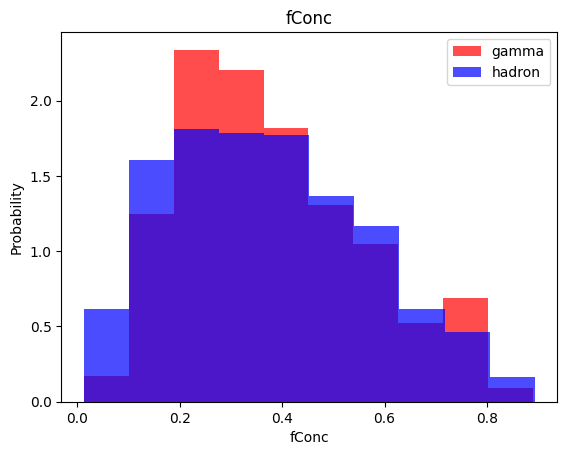

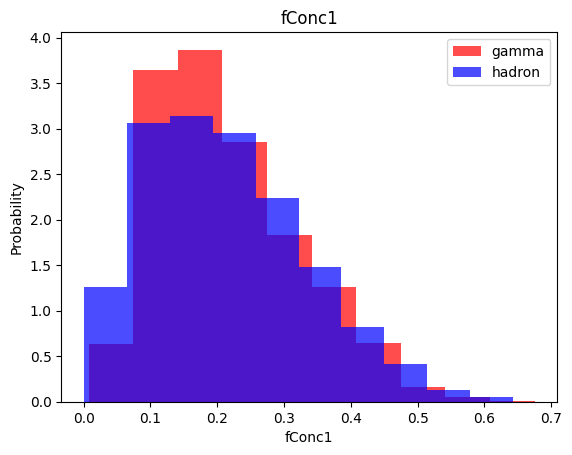

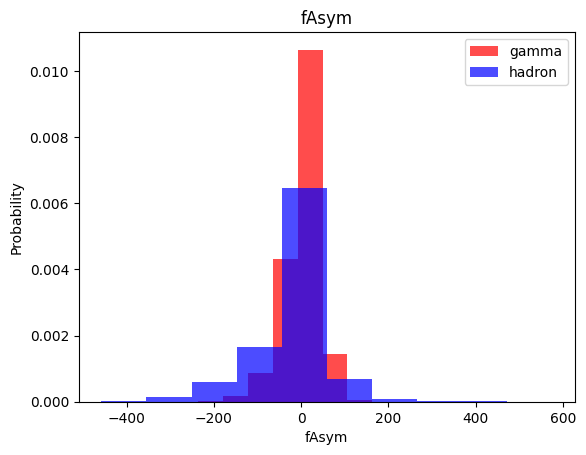

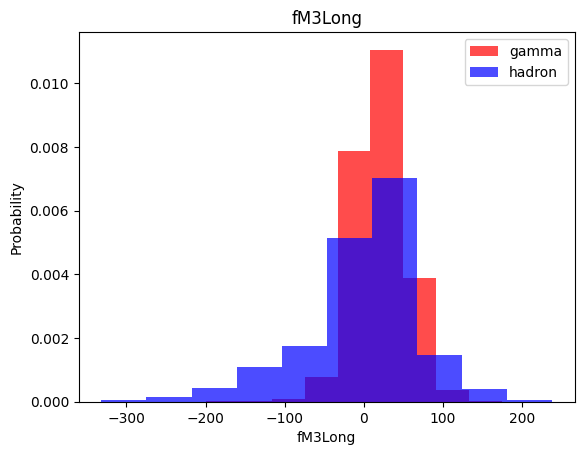

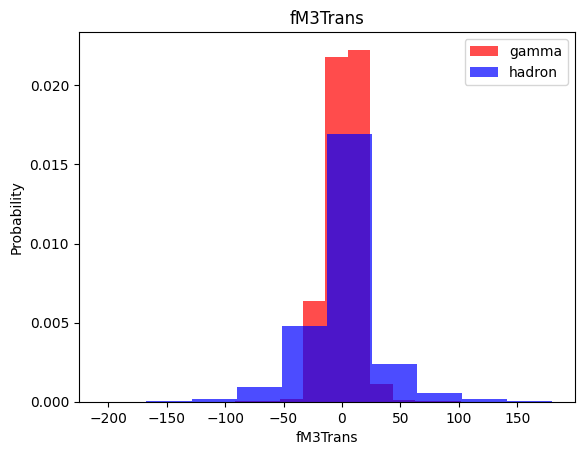

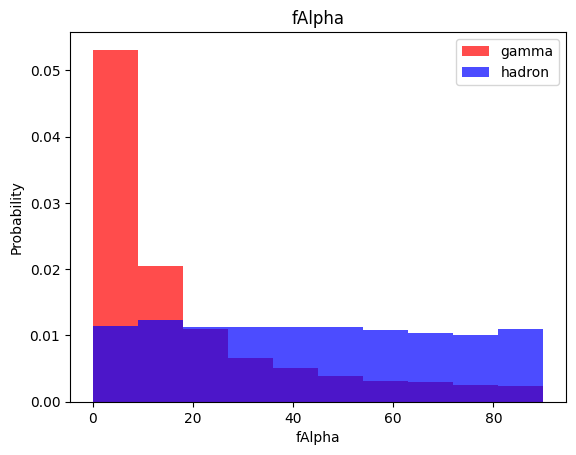

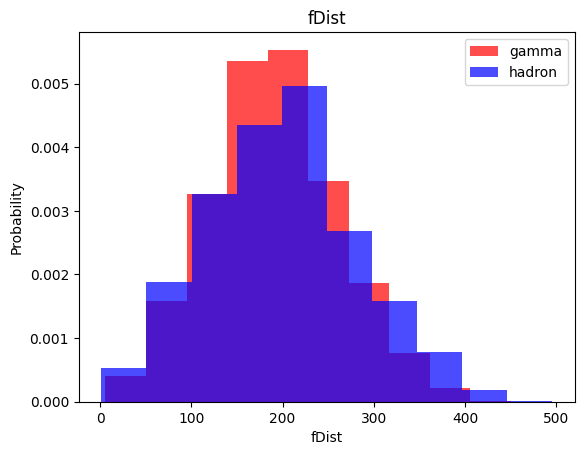

In [65]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color='red', label="gamma", alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color="blue", label="hadron", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, validation and test data set

In [93]:
train, valid, test = np.split(df.sample(frac=1), [int(len(df) * 0.6), int(len(df) * 0.8)])
print(type(train))

<class 'pandas.core.frame.DataFrame'>


/Users/dhimanroy/PythonProjects/machinelearning/.venv/lib/python3.9/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [94]:
# Depending on the features, the data's scale is very different
# The following function scales the data relative to the mean and standard deviation
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import numpy as np

def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    Y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, Y = ros.fit_resample(X, Y)

    data = np.hstack((X, np.reshape(Y, (-1, 1))))

    return data, X, Y


In [95]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

/Users/dhimanroy/PythonProjects/machinelearning/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dhimanroy/PythonProjects/machinelearning/.venv/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/dhimanroy/PythonProjects/machinelearning/.venv/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [88]:
#at the 50 min mark

14744